In [1]:
using Distributions
using Plots
using StatsBase

# unimodal distribution

In [153]:
unimodal=Gamma(3)
samples_uni=rand(unimodal,100000)
median(samples)

2.6767216425545106

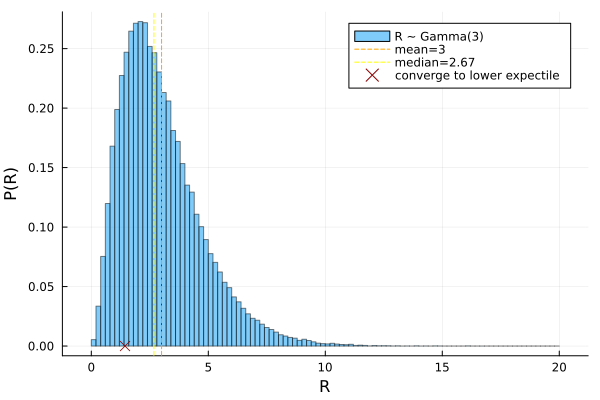

In [154]:
histogram(samples_uni;bins=0:0.2:20,normalize=true,legend=:topright,label="R ~ Gamma(3)",alpha=0.5,xlab="R",ylab="P(R)")
vline!([mean(samples_uni)],linestyle=:dash,color=:orange,label="mean=3")
vline!([median(samples_uni)],linestyle=:dash,color=:yellow,label="median=2.67")
# vline!([converge],linestyle=:dash,label="converge=3.017",color=:darkred)
scatter!([converge], [0], label = "converge to lower expectile", markershape=:x, markersize = 5, color=:darkred)


In [155]:
# let's play with RW model
blocks =10
trials = 10000
α = 0.01:0.001:0.02
vals = fill(0.0,trials,blocks)
for b in 1:blocks
    for t in 2:trials
        δ = samples_uni[t-1] - vals[t-1,b]
        # step function
#         if δ<0
#             δ=-5
#         elseif δ>0
#             δ=1
#         end
        # linear function
        if δ<0
            δ=0.5*δ
        elseif δ>0
            δ=2*δ
        end
        vals[t,b] = vals[t-1,b] + α[b] * δ
    end
end
converge=mean(vals[10000,:])
# plot(vals,legend=false)
# hline!([mean(samples)], color=:darkred, linestyle=:dash)

3.8939257148052766

# bimodal distribution of reward

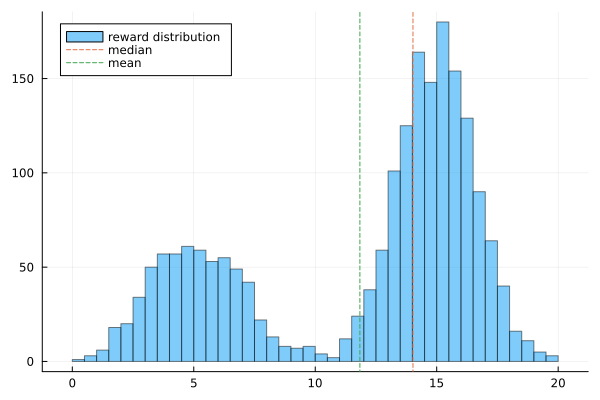

In [156]:
bimodal=MixtureModel(Normal[Normal(5, 2),Normal(15, 1.5)], [0.3, 0.7])
samples=rand(bimodal,2000)
histogram(samples;bins=0:0.5:20,legend=:topleft,label="reward distribution",alpha=0.5)
vline!([median(samples)], linestyle=:dash,label="median")
vline!([mean(samples)],linestyle=:dash,label="mean")

# traditional reinforcement learning
## converge to mean

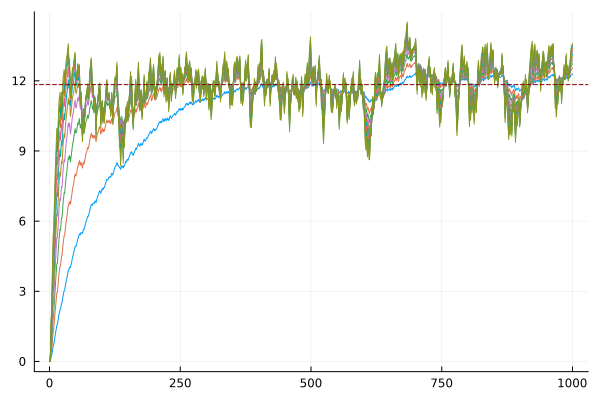

In [157]:
# RW model
blocks =10
trials = 1000
α = 0.01:0.01:0.1
vals = fill(0.0,trials,blocks)
for b in 1:blocks
    for t in 2:trials
        δ = samples[t-1] - vals[t-1,b]
        vals[t,b] = vals[t-1,b] + α[b] * δ
    end
end
plot(vals,legend=false)
hline!([mean(samples)], color=:darkred, linestyle=:dash)

## converge to median

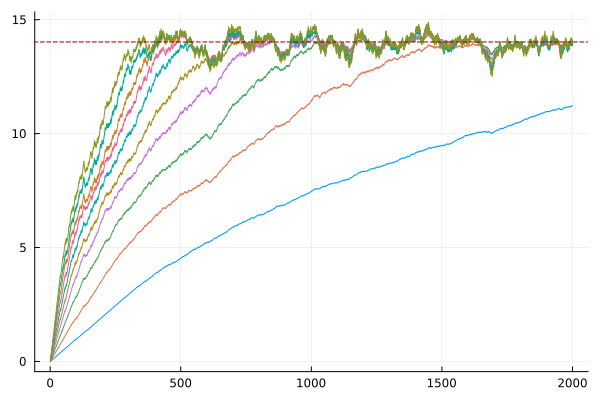

In [158]:
# binarize prediction error
blocks =10
trials = 2000
α = 0.01:0.01:0.1
vals = fill(0.0,trials,blocks)
for b in 1:blocks
    for t in 2:trials
        δ = samples[t-1] - vals[t-1,b]
        if δ > 0
            δ = 1
        else 
            δ = -1
        end
        vals[t,b] = vals[t-1,b] + α[b] * δ
    end
end
plot(vals,legend=false)
hline!([median(samples)], color=:darkred,linestyle=:dash)

# distributional reinforcement learning
## converge to quantile

In [166]:
# step 1: binarize prediction error
# step 2: add variability in learning rate
dblocks = 100
α₊ = range(start=0.001,stop=0.1,length=dblocks)
α₋ = range(start=0.1,stop=0.001,length=dblocks)

dvals = fill(0.0,trials,dblocks)

for b in 1:dblocks
    for t in 2:trials
        # println(x[t-1] - dvals[t-1,b])
        if samples[t-1] - dvals[t-1,b] > 0
            δ = 1
            dvals[t,b] = dvals[t-1,b] + α₊[b] * δ
        else
            δ = -1
            dvals[t,b] = dvals[t-1,b] + α₋[b] * δ
        end
    end
end


In [6]:
plot(dvals,legend=false)

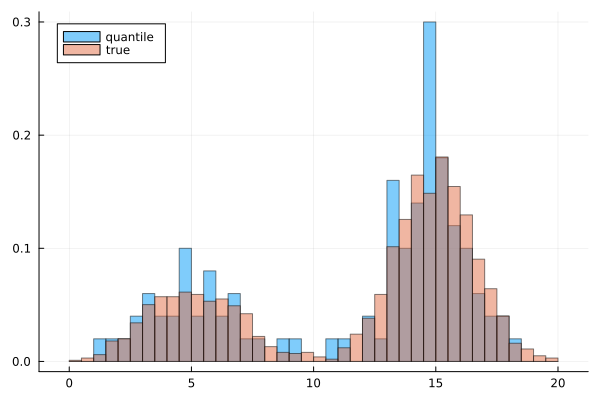

In [167]:
convergence = dvals[trials,:]
histogram(convergence,bins=0:0.5:20,normalize=true,legend=:topleft,label="quantile",alpha=0.5,ylims=[0,0.3])
histogram!(samples,bins=0:0.5:20,normalize=true,legend=:topleft,label="true",alpha=0.5)

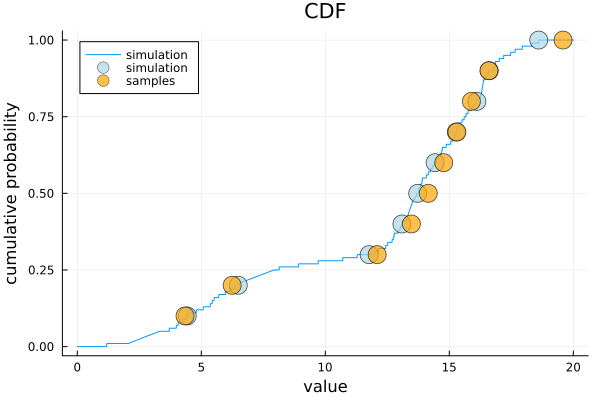

In [8]:
cdf_drl = ecdf(convergence)
plot(x -> cdf_drl(x), 0,20, legend=:topleft,label="simulation",title="CDF",xlab="value",ylab="cumulative probability")
quantiles=0.1:0.1:1
scatter!(quantile(convergence,quantiles), quantiles, markersize = 10,label="simulation",color=:lightblue,alpha=0.7)
scatter!(quantile(samples,quantiles), quantiles, markersize = 10,label="samples",color=:orange,alpha=0.7)


## converge to expectile

In [168]:
# add variability in learning rate
evals = fill(0.0,trials,dblocks)

for b in 1:dblocks
    for t in 2:trials
        δ = samples[t-1] - evals[t-1,b]
        # println(δ)
        if  δ > 0
            evals[t,b] = evals[t-1,b] + α₊[b] * δ
        else
            evals[t,b] = evals[t-1,b] + α₋[b] * δ
        end
    end
end


In [36]:
plot(evals,legend=false)

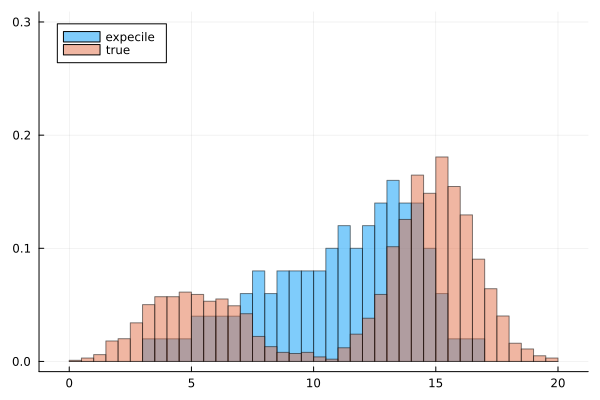

In [169]:
econvergence = evals[trials,:]
histogram(econvergence,bins=0:0.5:20,normalize=true,legend=:topleft,label="expecile",alpha=0.5,ylims=[0,0.3])
histogram!(samples,bins=0:0.5:20,normalize=true,legend=:topleft,label="true",alpha=0.5)

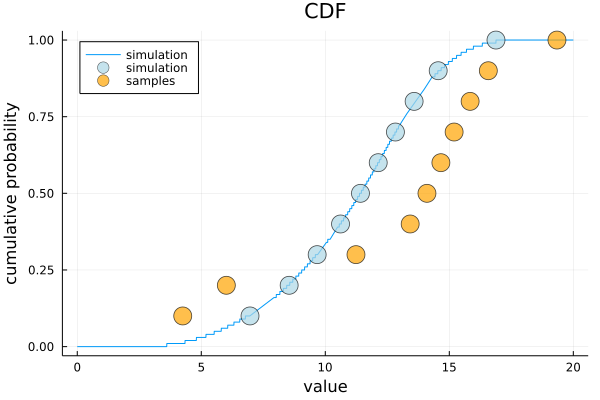

In [72]:
ecdf_drl = ecdf(econvergence)
plot(x -> ecdf_drl(x),0,20, legend=:topleft,label="simulation",title="CDF",xlab="value",ylab="cumulative probability")
quantiles=0.1:0.1:1
scatter!(quantile(econvergence,quantiles), quantiles, markersize = 10,label="simulation",color=:lightblue,alpha=0.7)
scatter!(quantile(samples,quantiles), quantiles, markersize = 10,label="samples",color=:orange,alpha=0.7)


## asymmetric scaling factor

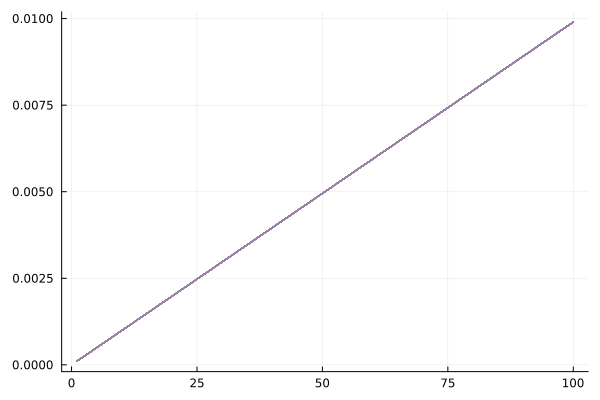

In [170]:
τ = α₊/(α₊ + α₋)
plot(τ,legend=false)